In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

mtalbert = pd.read_csv('../Data/soil data/AcrossAucklandRainfallStation/MtAlbert_Data_15mins.csv', index_col=['Timestamp (UTC+12:00)'], parse_dates=['Timestamp (UTC+12:00)'])
mtalbert.head()

,Rain(mm),SoilTemp(c),SoilMoisture(%)
Timestamp (UTC+12:00),,,
2018-07-07 11:15:00,0.0,10.4,37.364
2018-07-07 11:30:00,0.0,10.4,37.594
2018-07-07 11:45:00,0.0,10.4,37.590
2018-07-07 12:00:00,0.0,10.5,37.587
2018-07-07 12:15:00,0.0,10.5,37.584


In [7]:
mtalbert.tail()

,Rain(mm),SoilTemp(c),SoilMoisture(%)
Timestamp (UTC+12:00),,,
2024-10-21 19:00:00,0.0,18.391,46.736
2024-10-21 19:15:00,0.0,18.313,46.861
2024-10-21 19:30:00,0.0,18.316,46.861
2024-10-21 19:45:00,0.0,18.313,46.866
2024-10-21 20:00:00,0.0,18.316,46.903


In [8]:
mtalbert.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187529 entries, 2018-07-07 11:15:00 to 2024-10-21 20:00:00
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Rain(mm)         187529 non-null  float64
 1   SoilTemp(c)      187529 non-null  float64
 2   SoilMoisture(%)  187529 non-null  float64
dtypes: float64(3)
memory usage: 5.7 MB


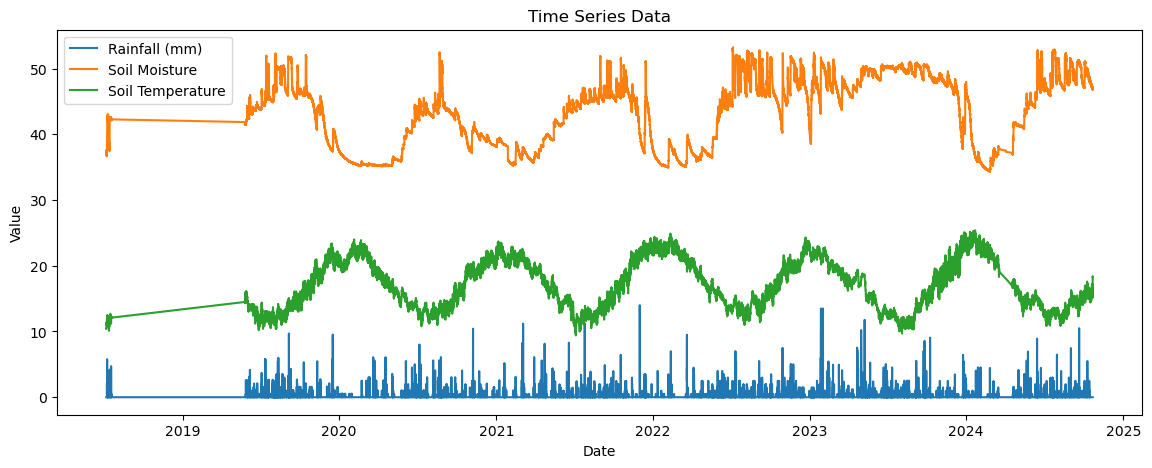

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(mtalbert['Rain(mm)'], label='Rainfall (mm)')
plt.plot(mtalbert['SoilMoisture(%)'], label='Soil Moisture')
plt.plot(mtalbert['SoilTemp(c)'], label='Soil Temperature')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Use seasonal decomposition to separate the time series into trend, seasonal, and residual components.

AttributeError: Line2D.set() got an unexpected keyword argument 'style'

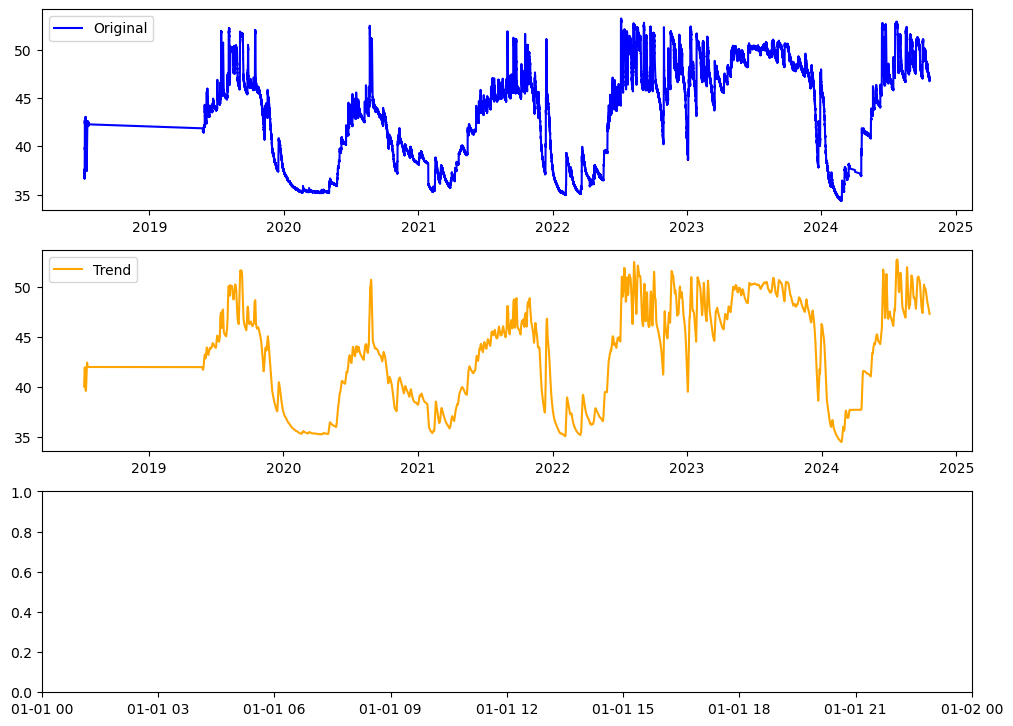

In [10]:

from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series data for soil moisture
decomposition = seasonal_decompose(mtalbert['SoilMoisture(%)'], model='additive', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 12))
plt.subplot(411)
plt.plot(mtalbert['SoilMoisture(%)'], label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green', style='dotted')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='red')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


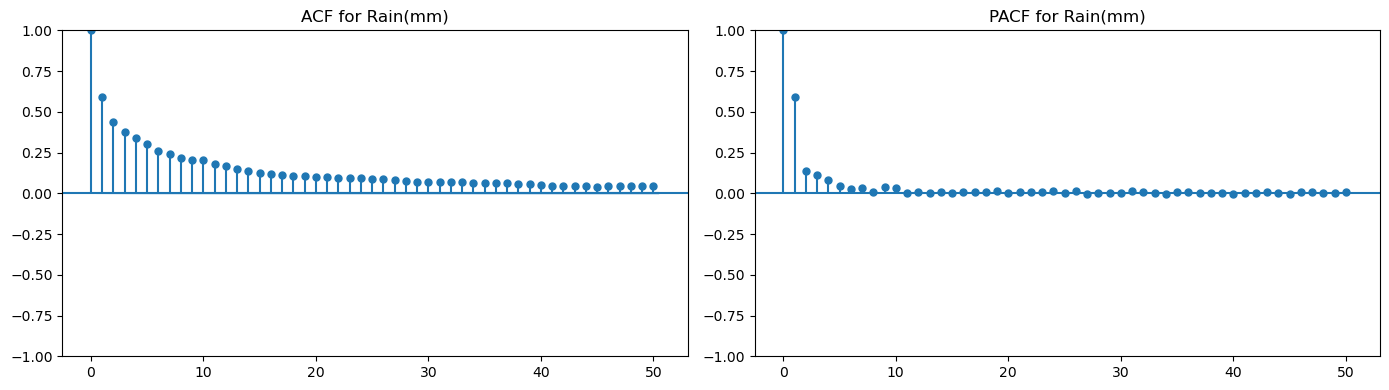

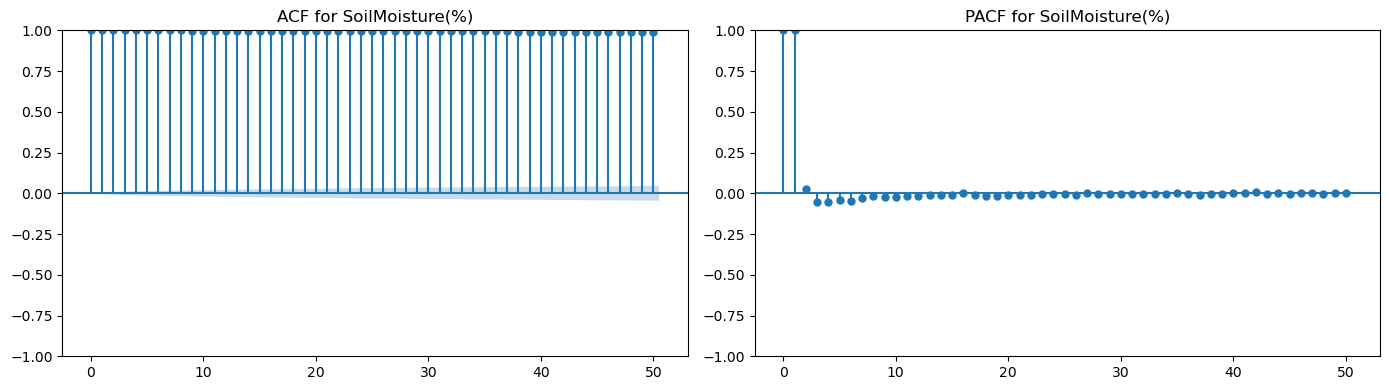

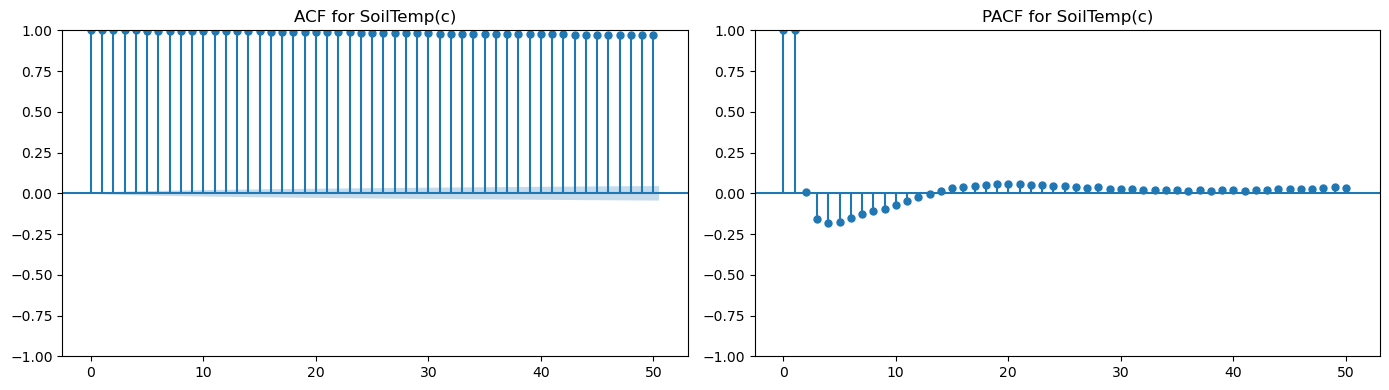

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

variables = ['Rain(mm)', 'SoilMoisture(%)', 'SoilTemp(c)']

# Plot ACF and PACF for each variable
for var in variables:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
    plot_acf(mtalbert[var], lags=96, ax=ax1, title=f'ACF for {var}')
    plot_pacf(mtalbert[var], lags=96, ax=ax2, title=f'PACF for {var}')
    plt.tight_layout()
    plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

lags = 50
for column in mtalbert.columns.difference(['Year', 'Month']):
    # Calculate ACF and PACF
    acf_values = acf(mtalbert[column], nlags=lags)
    pacf_values = pacf(mtalbert[column], nlags=lags)
    
    
    # Print the first few ACF and PACF values
    print(f"ACF values for {column}:")
    print(acf_values[:10])
    print(f"\nPACF values for {column}:")
    print(pacf_values[:10])
    print("\n------------------------------------------\n")

ACF values for Rain(mm):
[1.         0.59194086 0.43777994 0.37594165 0.33711652 0.29954538
 0.26181744 0.24123558 0.21383899 0.20687584]

PACF values for Rain(mm):
[1.         0.59194404 0.1345237  0.11293343 0.07911322 0.04694727
 0.02441997 0.034516   0.01092526 0.03636509]

------------------------------------------

ACF values for SoilMoisture(%):
[1.         0.99989364 0.99979333 0.99968142 0.9995595  0.99942853
 0.99928741 0.99913905 0.99898558 0.99882537]

PACF values for SoilMoisture(%):
[ 1.          0.99989901  0.02988594 -0.05659612 -0.05318642 -0.04503754
 -0.04767176 -0.0318979  -0.01800414 -0.02480962]

------------------------------------------

ACF values for SoilTemp(c):
[1.         0.99985286 0.99970776 0.99951544 0.99927222 0.99897463
 0.99862442 0.99822249 0.99776938 0.99726584]

PACF values for SoilTemp(c):
[ 1.          0.99985823  0.00708332 -0.16655729 -0.18700721 -0.1833588
 -0.15877861 -0.13440857 -0.11475407 -0.09789914]

------------------------------------

Rain(mm):

ACF shows significant autocorrelation at the first lag, indicating that rainfall tends to be correlated with itself at one-hour intervals.
PACF shows a significant value at the first lag, suggesting that the previous hour's rainfall has a direct impact on the current hour's rainfall.
SoilMoist:

Both ACF and PACF show very high values for the first few lags, indicating strong autocorrelation and partial autocorrelation. This suggests that soil moisture values are highly persistent and influenced by their immediate past values.
SoilTemp:

Similar to SoilMoist, SoilTemp also shows strong autocorrelation and partial autocorrelation, indicating persistence and influence from past values.

# Check for Stationarity and Determine d (Order of Differencing):

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test
result = adfuller(mtalbert['Rain(mm)'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -45.26262381718176
p-value: 0.0
Critical Values:
	1%: -3.430385112893292
	5%: -2.861555519427915
	10%: -2.5667782604346177


The Dickey-Fuller test results indicate that the series Rain(mm) is stationary. 
The ADF statistic is significantly lower than the critical values at the 1%, 5%, and 10% levels, and the p-value is very low (close to zero). 

This suggests strong evidence against the null hypothesis, indicating that the series is indeed stationary.

# Arima Model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

train_data_rain, test_data_rain = train_test_split(mtalbert['Rain(mm)'], test_size=0.3, shuffle=False)
model_rain = ARIMA(train_data_rain, order=(1, 0, 0))
model_fit_rain = model_rain.fit()

# Print AIC and BIC for Rain(mm)
print("AIC for Rain(mm):", model_fit_rain.aic)
print("BIC for Rain(mm):", model_fit_rain.bic)

AIC for Rain(mm): -9795.857606075668
BIC for Rain(mm): -9766.522359251621


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

forecast_steps = len(test_data_rain)
prediction = model_fit_rain.forecast(steps=forecast_steps)

rmse = sqrt(mean_squared_error(test_data_rain, prediction))
print(f"RMSE: {rmse}")

RMSE: 0.2770941517022035


In [ ]:
# from sklearn.model_selection import train_test_split
# train_data, test_data = train_test_split(temp_rain_soil['SoilMoist'], test_size=0.3, shuffle=False)
# print(f"Train data length: {len(train_data)}")
# print(f"Test data length: {len(test_data)}")

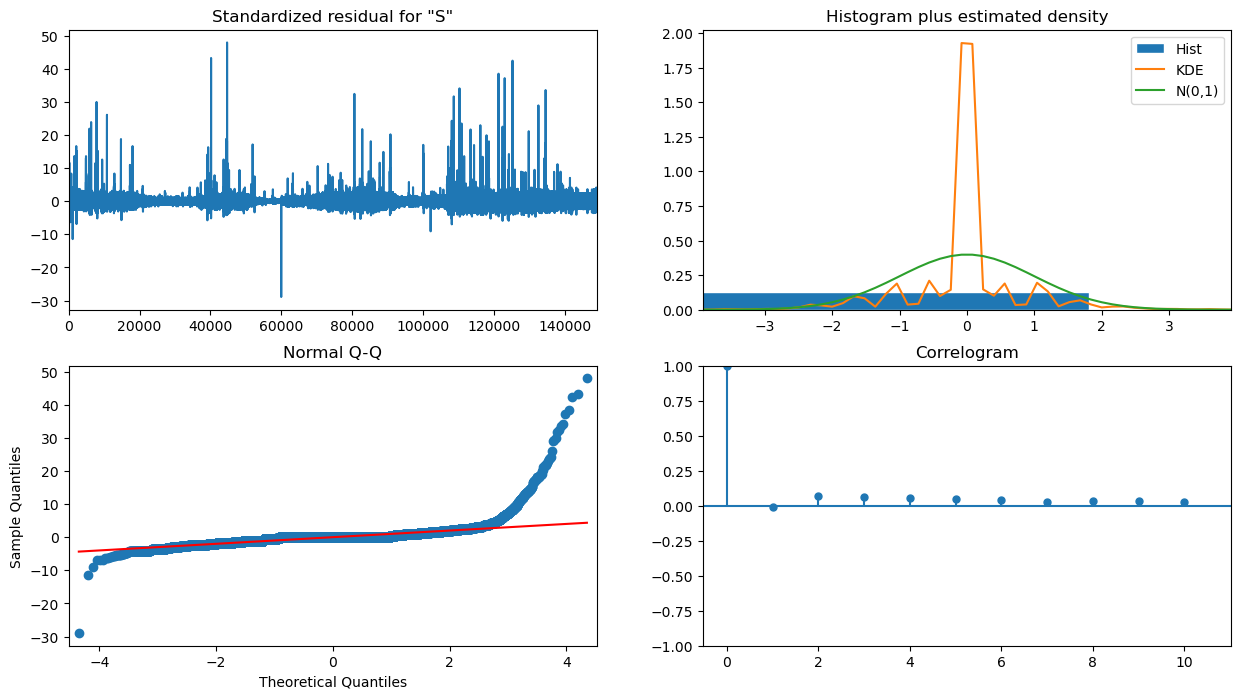

AIC for SoilMoist: -360602.9534371583
BIC for SoilMoist: -360573.21758752957


In [ ]:
from sklearn.model_selection import train_test_split
train_data_soil_moist, test_data_soil_moist = train_test_split(mtalbert['SoilMoisture(%)'], test_size=0.2, shuffle=False)

model_soil_moist = ARIMA(train_data_soil_moist, order=(1, 0, 0))
model_fit_soil_moist = model_soil_moist.fit()

model_fit_soil_moist.plot_diagnostics(figsize=(15,8))
plt.show()

print("AIC for SoilMoist:", model_fit_soil_moist.aic)
print("BIC for SoilMoist:", model_fit_soil_moist.bic)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

forecast_steps = len(test_data_rain)
prediction = model_fit_rain.forecast(steps=forecast_steps)

rmse = sqrt(mean_squared_error(test_data_rain, prediction))

# Calculate MAE
mae = mean_absolute_error(test_data_rain, prediction)

# Calculate MSE
mse = mean_squared_error(test_data_rain, prediction)

# Calculate R2 score
r2 = r2_score(test_data_rain, prediction)

# Print the metrics
print("Airima Root Mean Squared Error (RMSE):", rmse)
print("Airima Mean Absolute Error (MAE):", mae)
print("Airima Mean Squared Error (MSE):", mse)
print("Airima R2 Score:", r2)

RMSE: 5.018312017357388


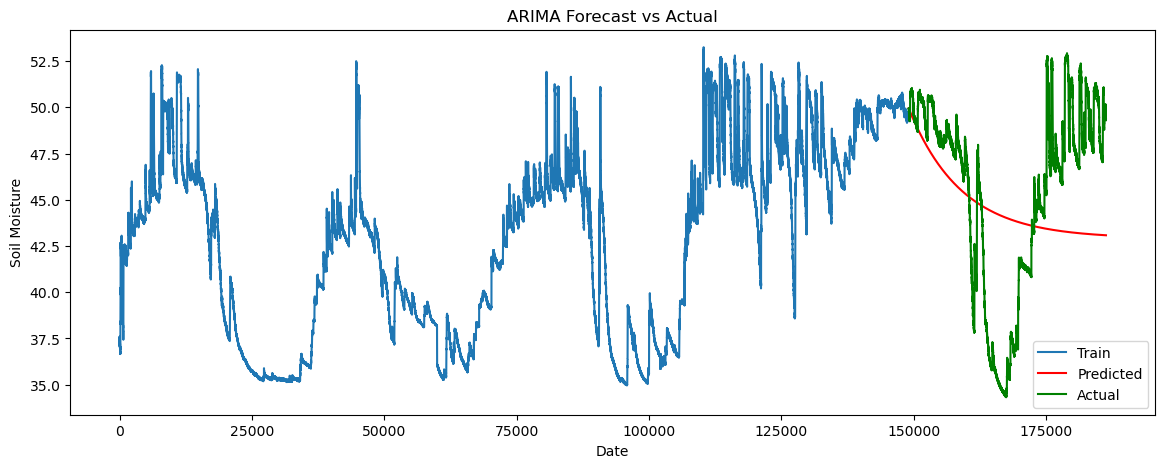

In [ ]:
# Plotting
plt.figure(figsize=(14, 5))
plt.plot(train_data_soil_moist, label='Train')
plt.plot(test_data_soil_moist.index, prediction, color='red', label='Predicted')
plt.plot(test_data_soil_moist, color='green', label='Actual')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Soil Moisture')
plt.legend()
plt.show()

# explore other orders selection using grid search

# Sarima Model
